In [ ]:
'''
Regression - Concrete compressive strength data
from https://archive.ics.uci.edu/ml/datasets/Concrete+Compressive+Strength
Last Updated : 03/31/2019, by Hyungmin Jun (hyungminjun@outlook.com)

=============================================================================

Regression using Keras
Copyright 2019 Hyungmin Jun. All rights reserved.

License - GPL version 3
This program is free software: you can redistribute it and/or modify it under
the terms of the GNU General Public License as published by the Free Software
Foundation, either version 3 of the License, or any later version. This
program is distributed in the hope that it will be useful, but WITHOUT ANY
WARRANTY; without even the implied warranty of MERCHANTABILITY or FITNESS FOR
A PARTICULAR PURPOSE. See the GNU General Public License for more details.
You should have received a copy of the GNU General Public License along with
this program. If not, see <http://www.gnu.org/licenses/>.
'''

In [28]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from keras.layers import *
from keras.models import *
from keras.utils import *
from sklearn.preprocessing import *
from sklearn.model_selection import train_test_split
import seaborn as sns

%matplotlib inline

In [29]:
df = pd.read_excel('https://archive.ics.uci.edu/ml/machine-learning-databases/concrete/compressive/Concrete_Data.xls')
df.head()
df.describe()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


In [30]:
df.columns
df.rename(columns={
    'Cement (component 1)(kg in a m^3 mixture)' : 'cement',
    'Blast Furnace Slag (component 2)(kg in a m^3 mixture)': 'blast',
    'Fly Ash (component 3)(kg in a m^3 mixture)' : 'fly',
    'Water  (component 4)(kg in a m^3 mixture)' : 'water',
    'Superplasticizer (component 5)(kg in a m^3 mixture)': 'super',
    'Coarse Aggregate  (component 6)(kg in a m^3 mixture)' : 'coarse',
    'Fine Aggregate (component 7)(kg in a m^3 mixture)' : 'fine',
    'Age (day)' : 'age',
    'Concrete compressive strength(MPa, megapascals) ': 'strength'}, inplace=True)
df.head()

x = df.drop('strength', axis=1)
x

y = df['strength']
y

scaler = MinMaxScaler()
x = scaler.fit_transform(x)

c:\users\hyung\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


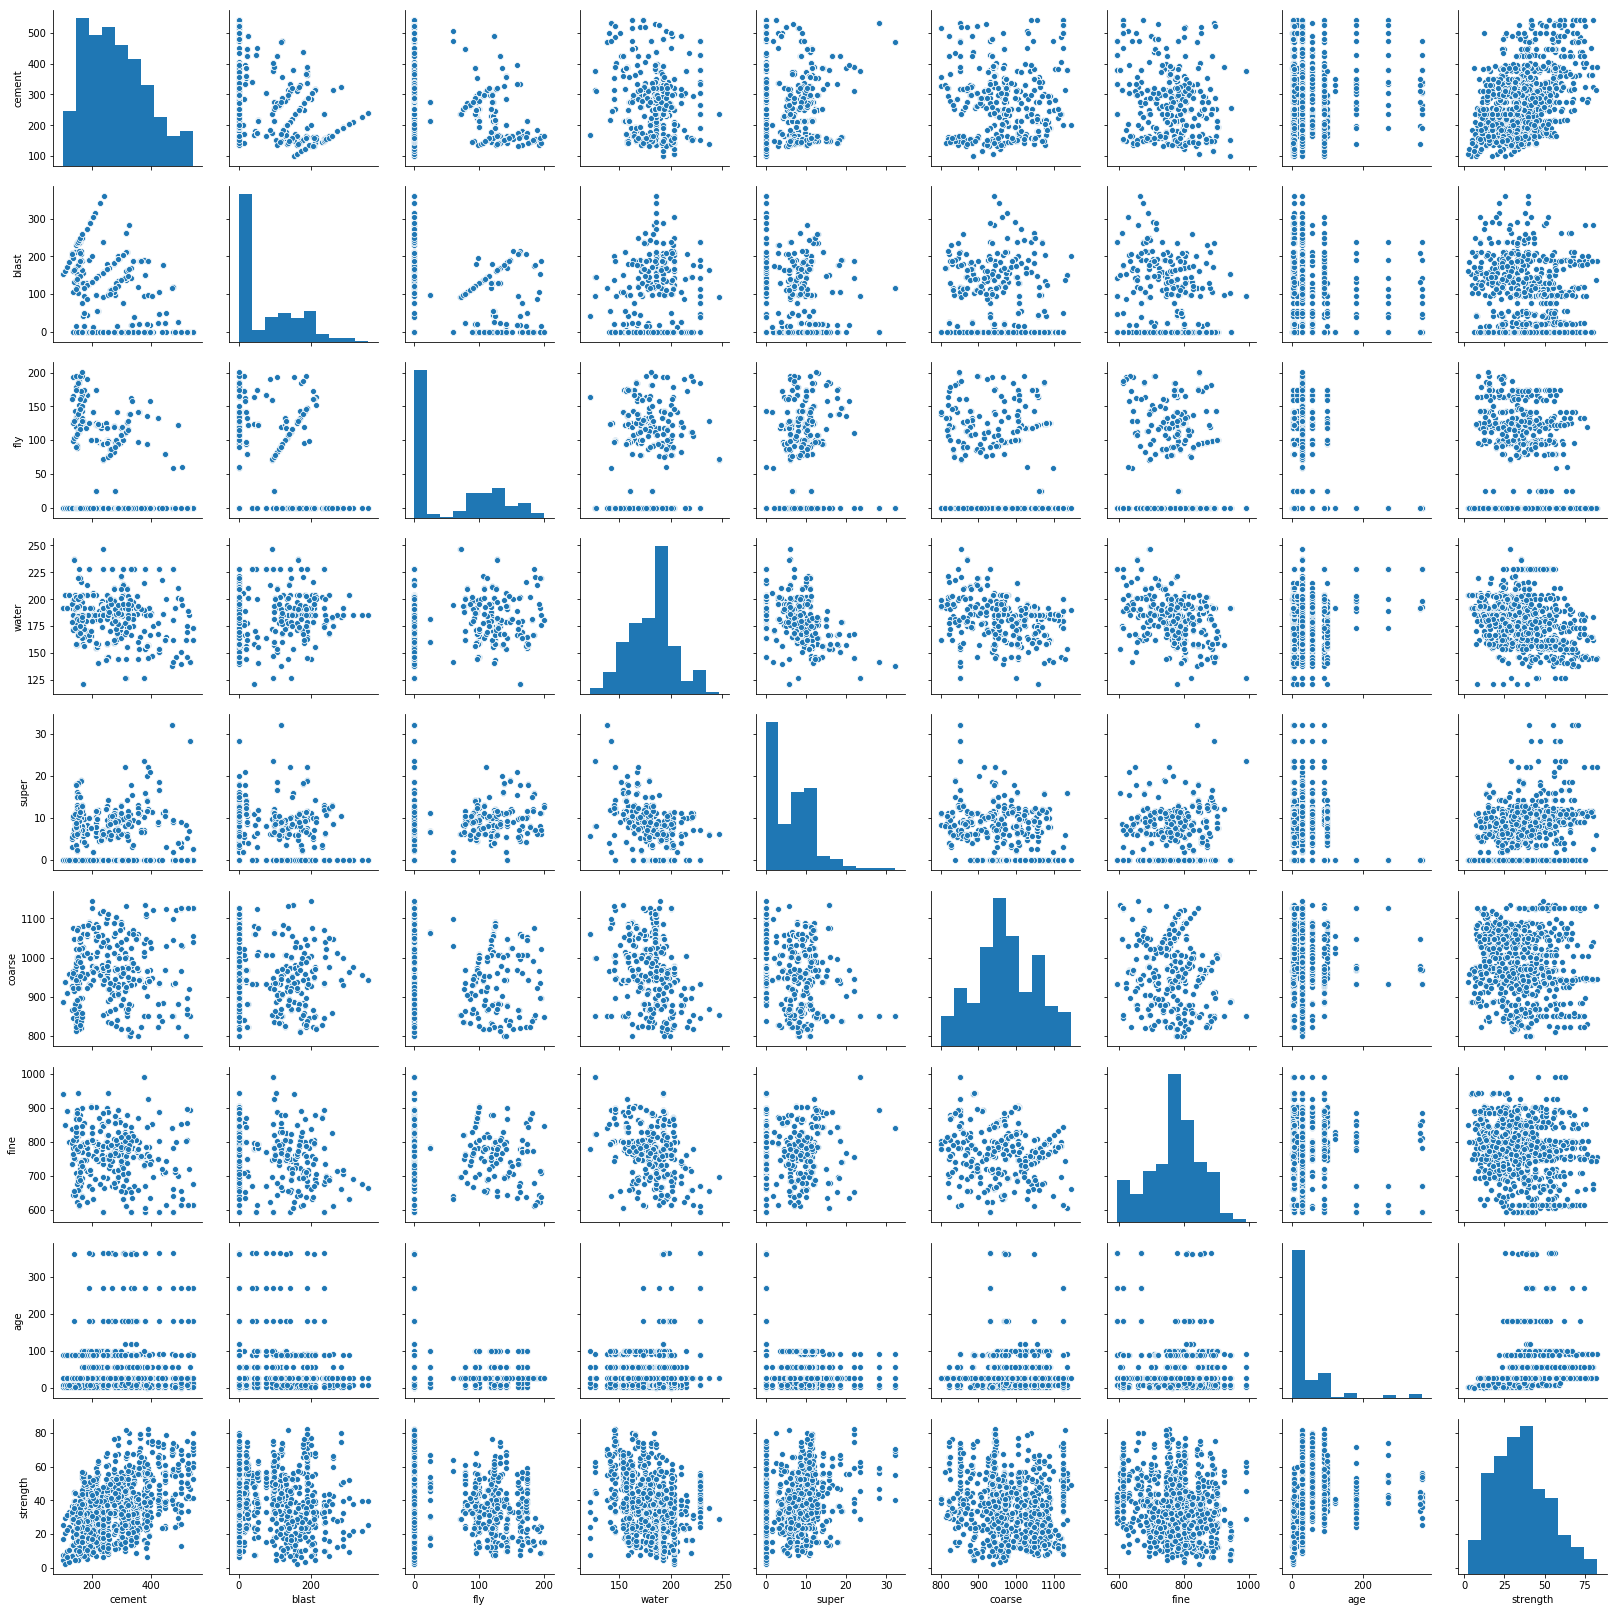

In [31]:
  sns.pairplot(df)

In [75]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
x_train.shape

(824, 8)

In [87]:
model = Sequential()
model.add(Dense(1024, activation='relu', input_shape=(8,)))
model.add(Dense(512,  activation='relu'))
model.add(Dense(128,  activation='relu'))
model.add(Dense(1,    activation='relu'))

model.compile(loss='mse', optimizer='adam')

model.summary()

hist = model.fit(x_train, y_train, epochs=50, validation_split=0.1)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_97 (Dense)             (None, 1024)              9216      
_________________________________________________________________
dense_98 (Dense)             (None, 512)               524800    
_________________________________________________________________
dense_99 (Dense)             (None, 128)               65664     
_________________________________________________________________
dense_100 (Dense)            (None, 1)                 129       
Total params: 599,809
Trainable params: 599,809
Non-trainable params: 0
_________________________________________________________________
Train on 741 samples, validate on 83 samples
Epoch 1/50
741/741 [==============================] - 1s 1ms/step - loss: 928.2002 - val_loss: 467.9184
Epoch 2/50
741/741 [==============================] - 0s 278us/step - loss: 243.0320 - val_loss: 208.9438
Epoch 3/50
74

Text(0.5, 1.0, 'loss')

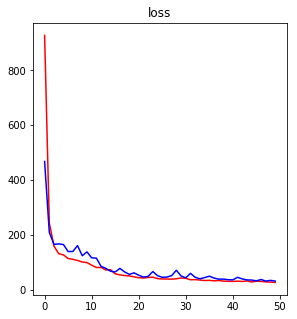

In [88]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(hist.history['loss'], color = 'r')
plt.plot(hist.history['val_loss'], color = 'b')
plt.title('loss')

In [89]:
score = model.evaluate(x_test, y_test)
print (score)

pred = model.predict(x_test[-5:])
print(pred)
print(y_test[-5:])

206/206 [==============================] - 0s 77us/step
36.59051521079054
[[21.988487 ]
 [13.981686 ]
 [25.012743 ]
 [26.233583 ]
 [15.4991665]]
928    24.579819
674    13.565440
345    33.729166
951    19.009543
598    13.224150
Name: strength, dtype: float64
